In [1]:
import sys
sys.path.append('../..') # Asegúrate de que Python pueda encontrar el paquete src


# import libraries
import numpy as np
from typing import Dict, Any
import matplotlib.pyplot as plt
import scienceplots

from src.physics.pulses import GaussianPulse1D, GaussianPulse2D,  format_value

plt.style.use(['science', 'notebook'])
# plt.style.use('dark_background')

c = 299792458  # (m/s)

In [2]:
# Input beam parameters
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

input_pulse = GaussianPulse1D(x0=fundamental_wavelength, FWHM=input_width_wl, steps=1000)
wavelenght, A_wavelenght = input_pulse.generate_pulse()
wavelenght, I_wavelenght = input_pulse.generate_intensity()
sigma_wavelength = input_pulse.standard_deviation()

# Obtener el diccionario con los parámetros del pulso
pulse_dict = input_pulse.as_dict()
print("--------------- Pulse parameters in wavelength --------------- ")
for key, value in pulse_dict.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")

# Parameters in frequency
fundamental_frequency = (2*np.pi*c) / fundamental_wavelength  # (Hz = 1/s) | 23.69 PHz
sigma_frequency = (2*np.pi*c) / (fundamental_wavelength**2) * sigma_wavelength  # (Hz) | 55.69 PHz

input_pulse_omega = GaussianPulse1D(x0=fundamental_frequency, steps=1000, std=sigma_frequency)
omega, A_omega = input_pulse_omega.generate_pulse()
omega, I_omega = input_pulse_omega.generate_intensity()

# Obtener el diccionario con los parámetros del pulso
pulse_dict_omega = input_pulse_omega.as_dict()
print("--------------- Pulse parameters in frequency --------------- ")
for key, value in pulse_dict_omega.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")

--------------- Pulse parameters in wavelength --------------- 
Center: 7.95e-07
Fwhm: 4.40e-08
Sigma: 1.87e-08
Steps: 1000
Times Std: 5
Computed Fwhm: 4.40e-08
--------------- Pulse parameters in frequency --------------- 
Center: 2.37e+15
Fwhm: None
Sigma: 5.57e+13
Steps: 1000
Times Std: 5
Computed Fwhm: 1.31e+14


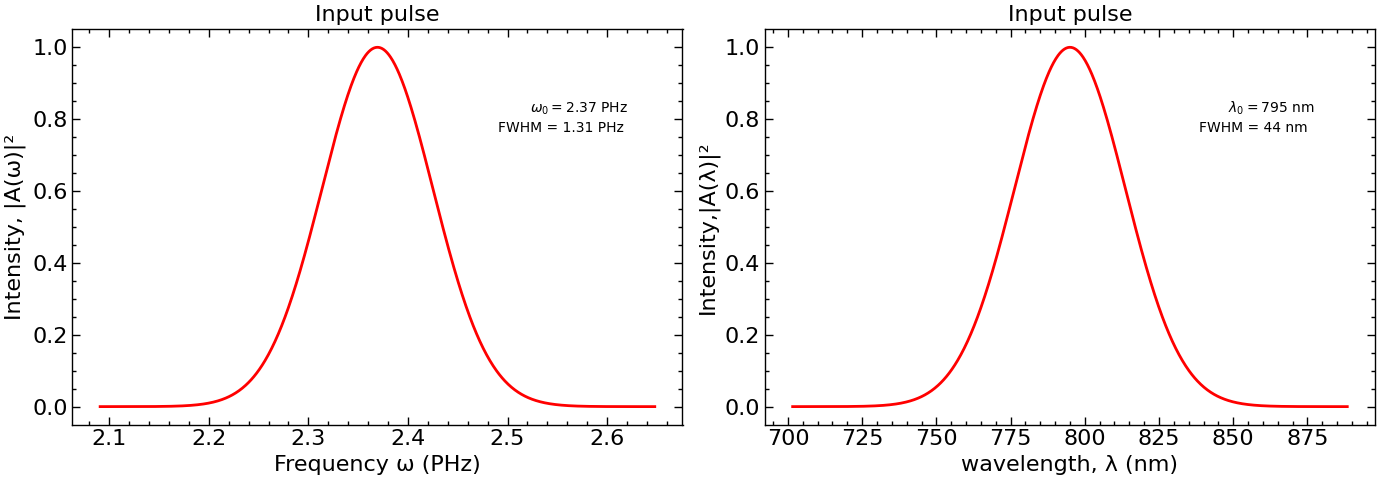

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica (a): Pulso de entrada vs omega
axs[0].plot(omega*1e-15, I_omega , color='red', linestyle='-')
axs[0].set_ylabel('Intensity, |A(ω)|²')
axs[0].set_xlabel('Frequency ω (PHz)')
axs[0].set_title('Input pulse')
# Agregar texto en la gráfica (b)
axs[0].text(0.83, 0.8, r"$\omega_0 = 2.37$ PHz", ha='center', va='center', transform=axs[0].transAxes, fontsize=10)
axs[0].text(0.8, 0.75, r"FWHM = 1.31 PHz", ha='center', va='center', transform=axs[0].transAxes, fontsize=10)

# Gráfica (a): Pulso de entrada vs longitud de onda
axs[1].plot(wavelenght*1e9, I_wavelenght, color='red', linestyle='-')
axs[1].set_ylabel('Intensity,|A(λ)|²')
axs[1].set_xlabel('wavelength, λ (nm)')
axs[1].set_title('Input pulse')
# Agregar texto en la gráfica (b)
axs[1].text(0.83, 0.8, r"$\lambda_0 = 795$ nm", ha='center', va='center', transform=axs[1].transAxes, fontsize=10)
axs[1].text(0.8, 0.75, r"FWHM = 44 nm", ha='center', va='center', transform=axs[1].transAxes, fontsize=10)

plt.tight_layout()
plt.show()

### Fundamental pulse convolution
---

**Self-Convolution Term $(F(\omega))$**: Autoconvolution of the fundamental field
            
$$
     (A * A)(\omega) = F(\omega) = \int_{\mathbb{R}} A_\omega(\omega') A_\omega(\omega - \omega') \, d\omega'
$$

where
- $\omega'$: is the frequency of the fundamental field.
- $\omega$: is the frequency of the harmonic field.

In [4]:
# Import NumPy
import numpy as np

# First input array
a = np.array([3, 7])
print("First vector: ", a)

# Second input array
v = np.array([1, 2, 5, 7])
print("Second vector: ", v)

print("Convolution using full mode:")
# Using convolve() function in "full" mode:
print(np.convolve(a, v))


First vector:  [3 7]
Second vector:  [1 2 5 7]
Convolution using full mode:
[ 3 13 29 56 49]


In [5]:
conv_fundamental_pulse = np.convolve(A_omega, A_omega,mode='same')

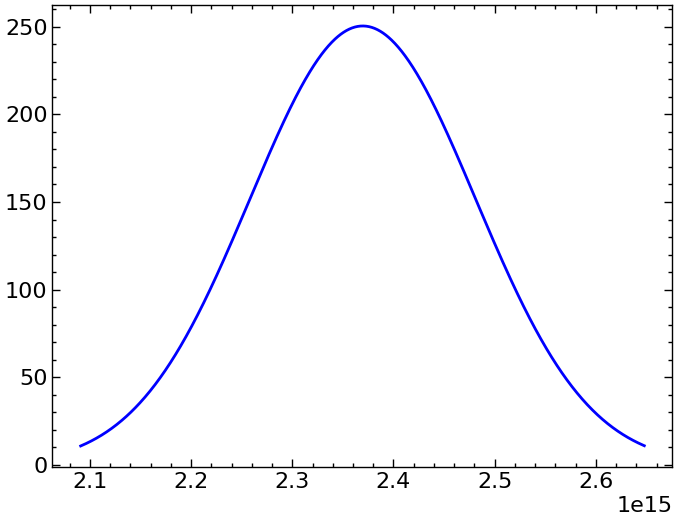

In [6]:
plt.plot(omega, conv_fundamental_pulse, color='blue', linestyle='-')